In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="yrRxUMyPuFmAEbJMWJw1")
project = rf.workspace("test-7awfy").project("weapon-detection-f1lih")
dataset = project.version(1).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna
    Found existing

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to weapon-detection-1 in yolov8:: 100%|██████████| 19278/19278 [00:02<00:00, 6877.30it/s]


In [ ]:
import os
HOME=os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()
!yolomodel=checks

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

# Training

In [ ]:
# %cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/weapon-detection-1/data.yaml epochs=10 imgsz=800 plots=True

100% 21.5M/21.5M [00:00<00:00, 173MB/s]
Ultralytics YOLOv8.0.219 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/weapon-detection-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					   PR_curve.png		  val_batch0_pred.jpg
confusion_matrix_normalized.png			   R_curve.png		  val_batch1_labels.jpg
confusion_matrix.png				   results.csv		  val_batch1_pred.jpg
events.out.tfevents.1701143523.73eca3aafeb6.775.0  results.png		  val_batch2_labels.jpg
F1_curve.png					   train_batch0.jpg	  val_batch2_pred.jpg
labels_correlogram.jpg				   train_batch1.jpg	  weights
labels.jpg					   train_batch2.jpg
P_curve.png					   val_batch0_labels.jpg


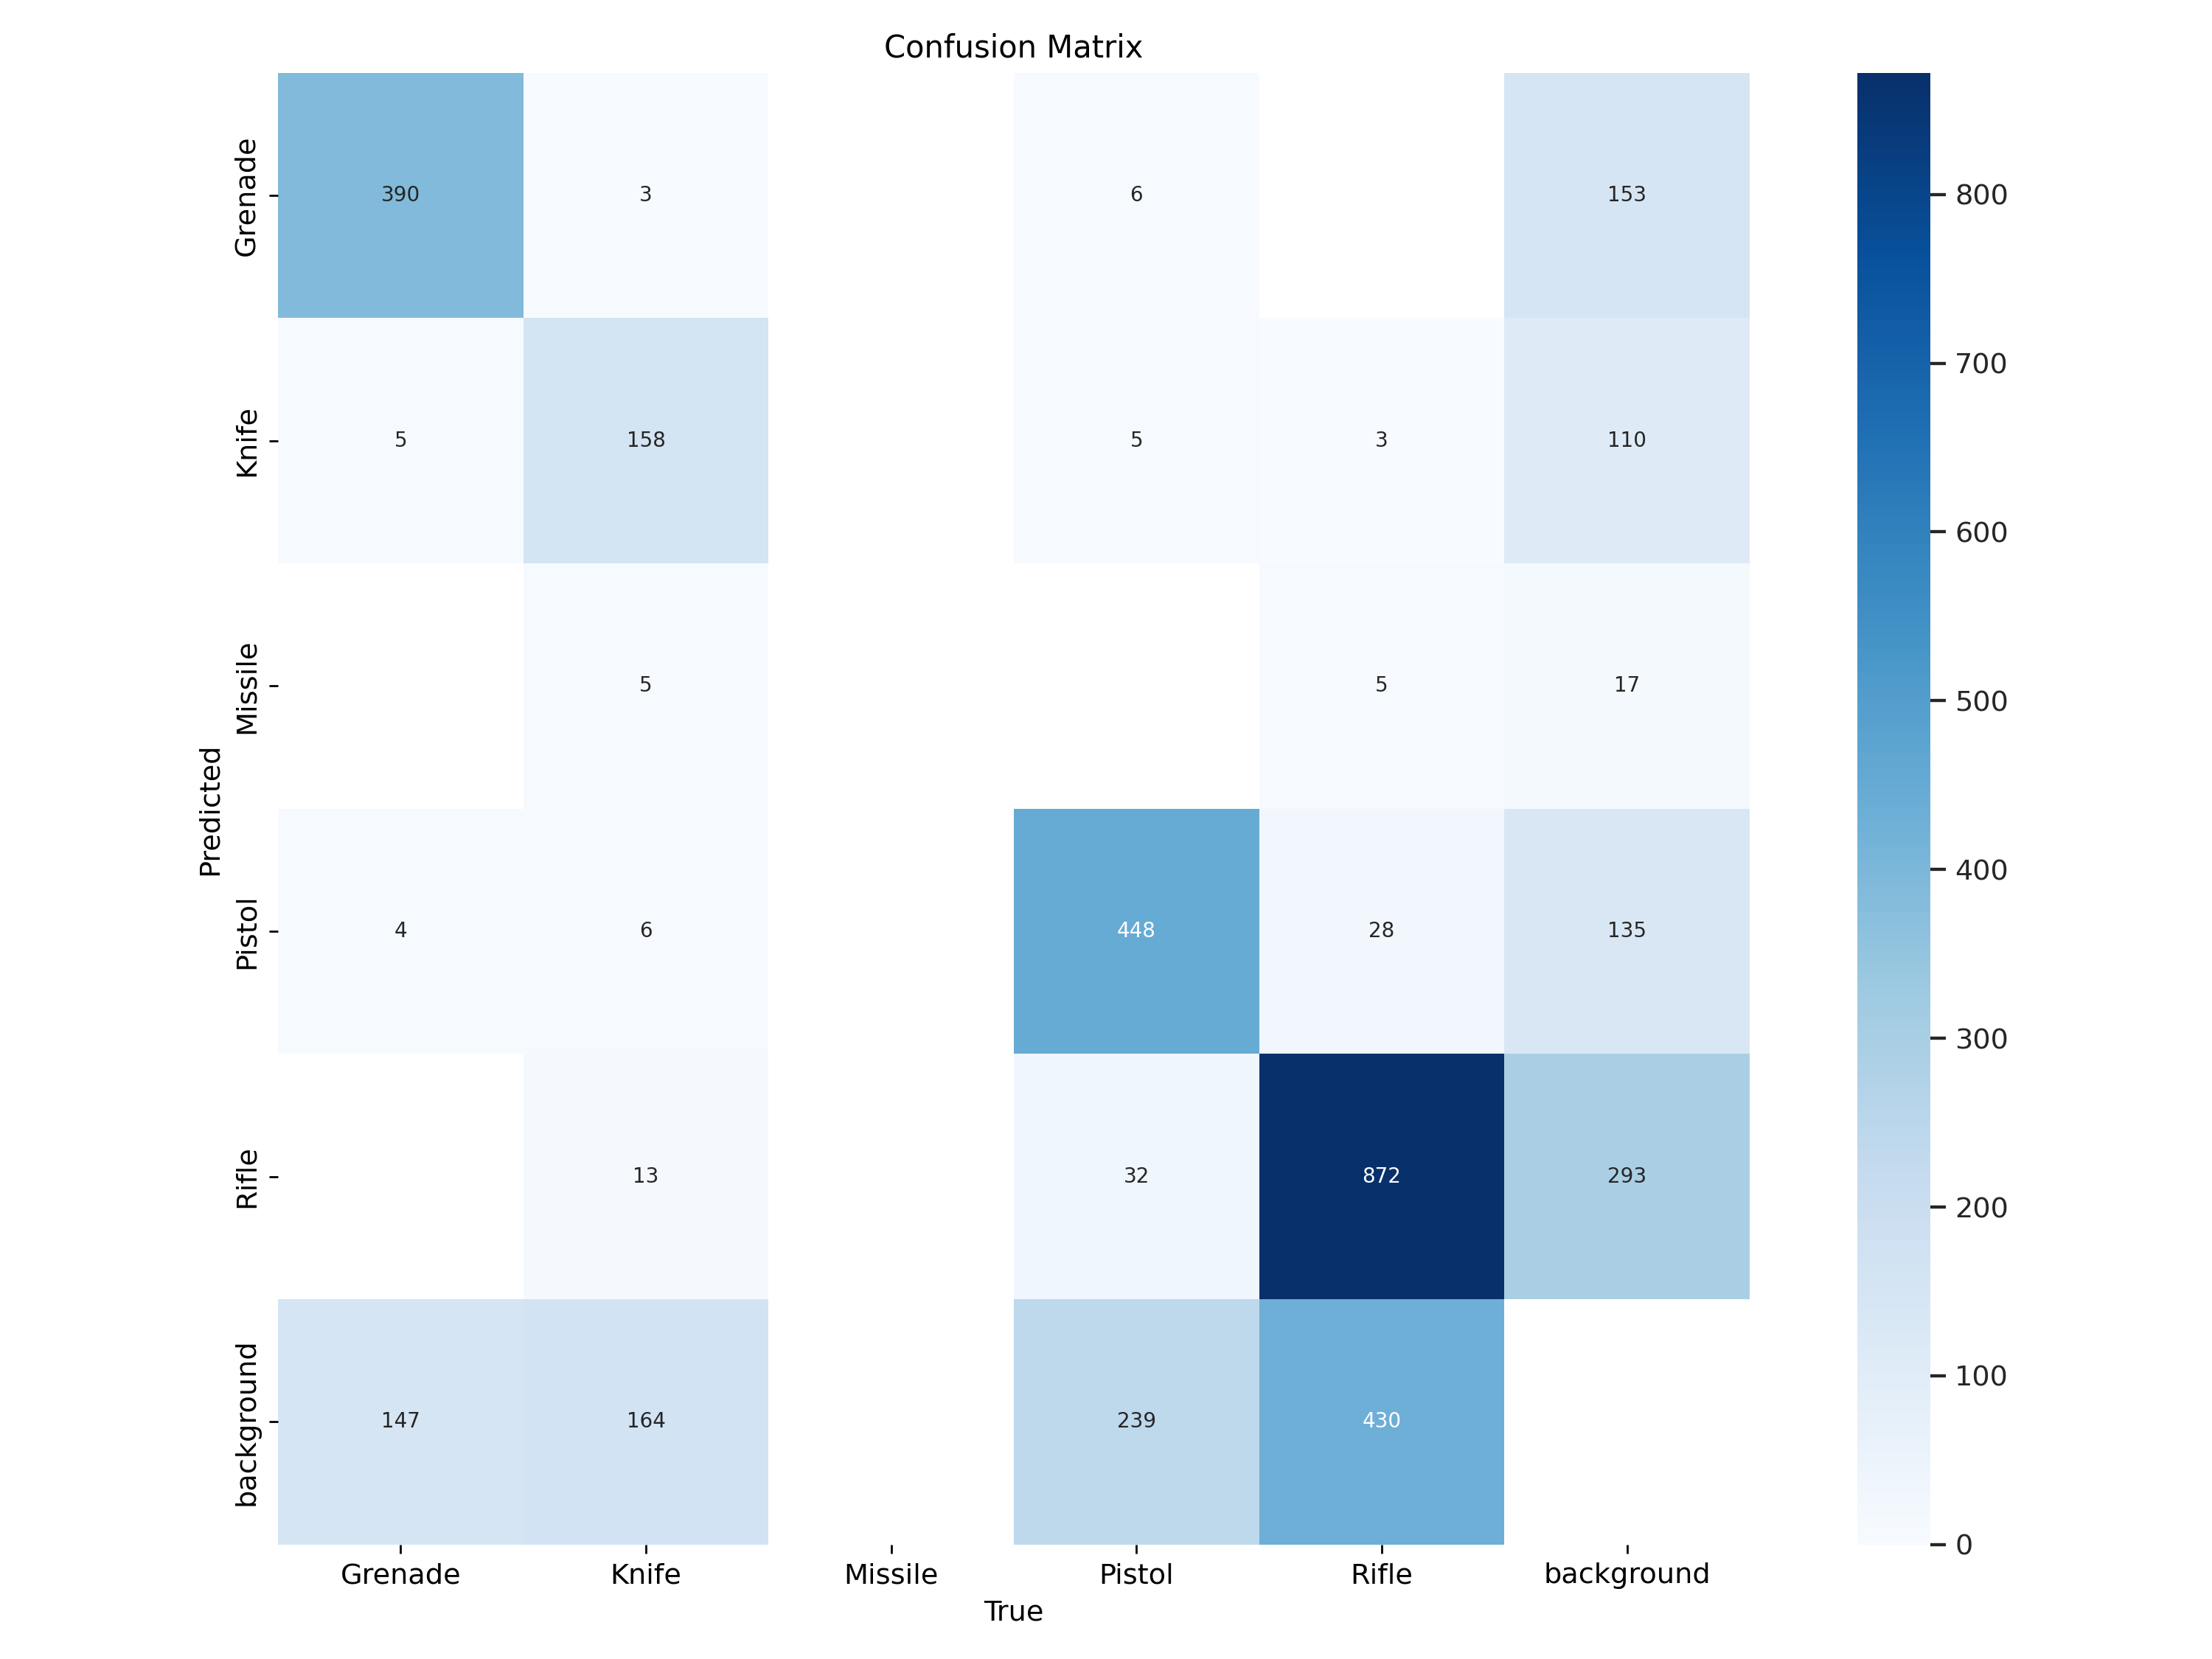

In [ ]:
# %cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

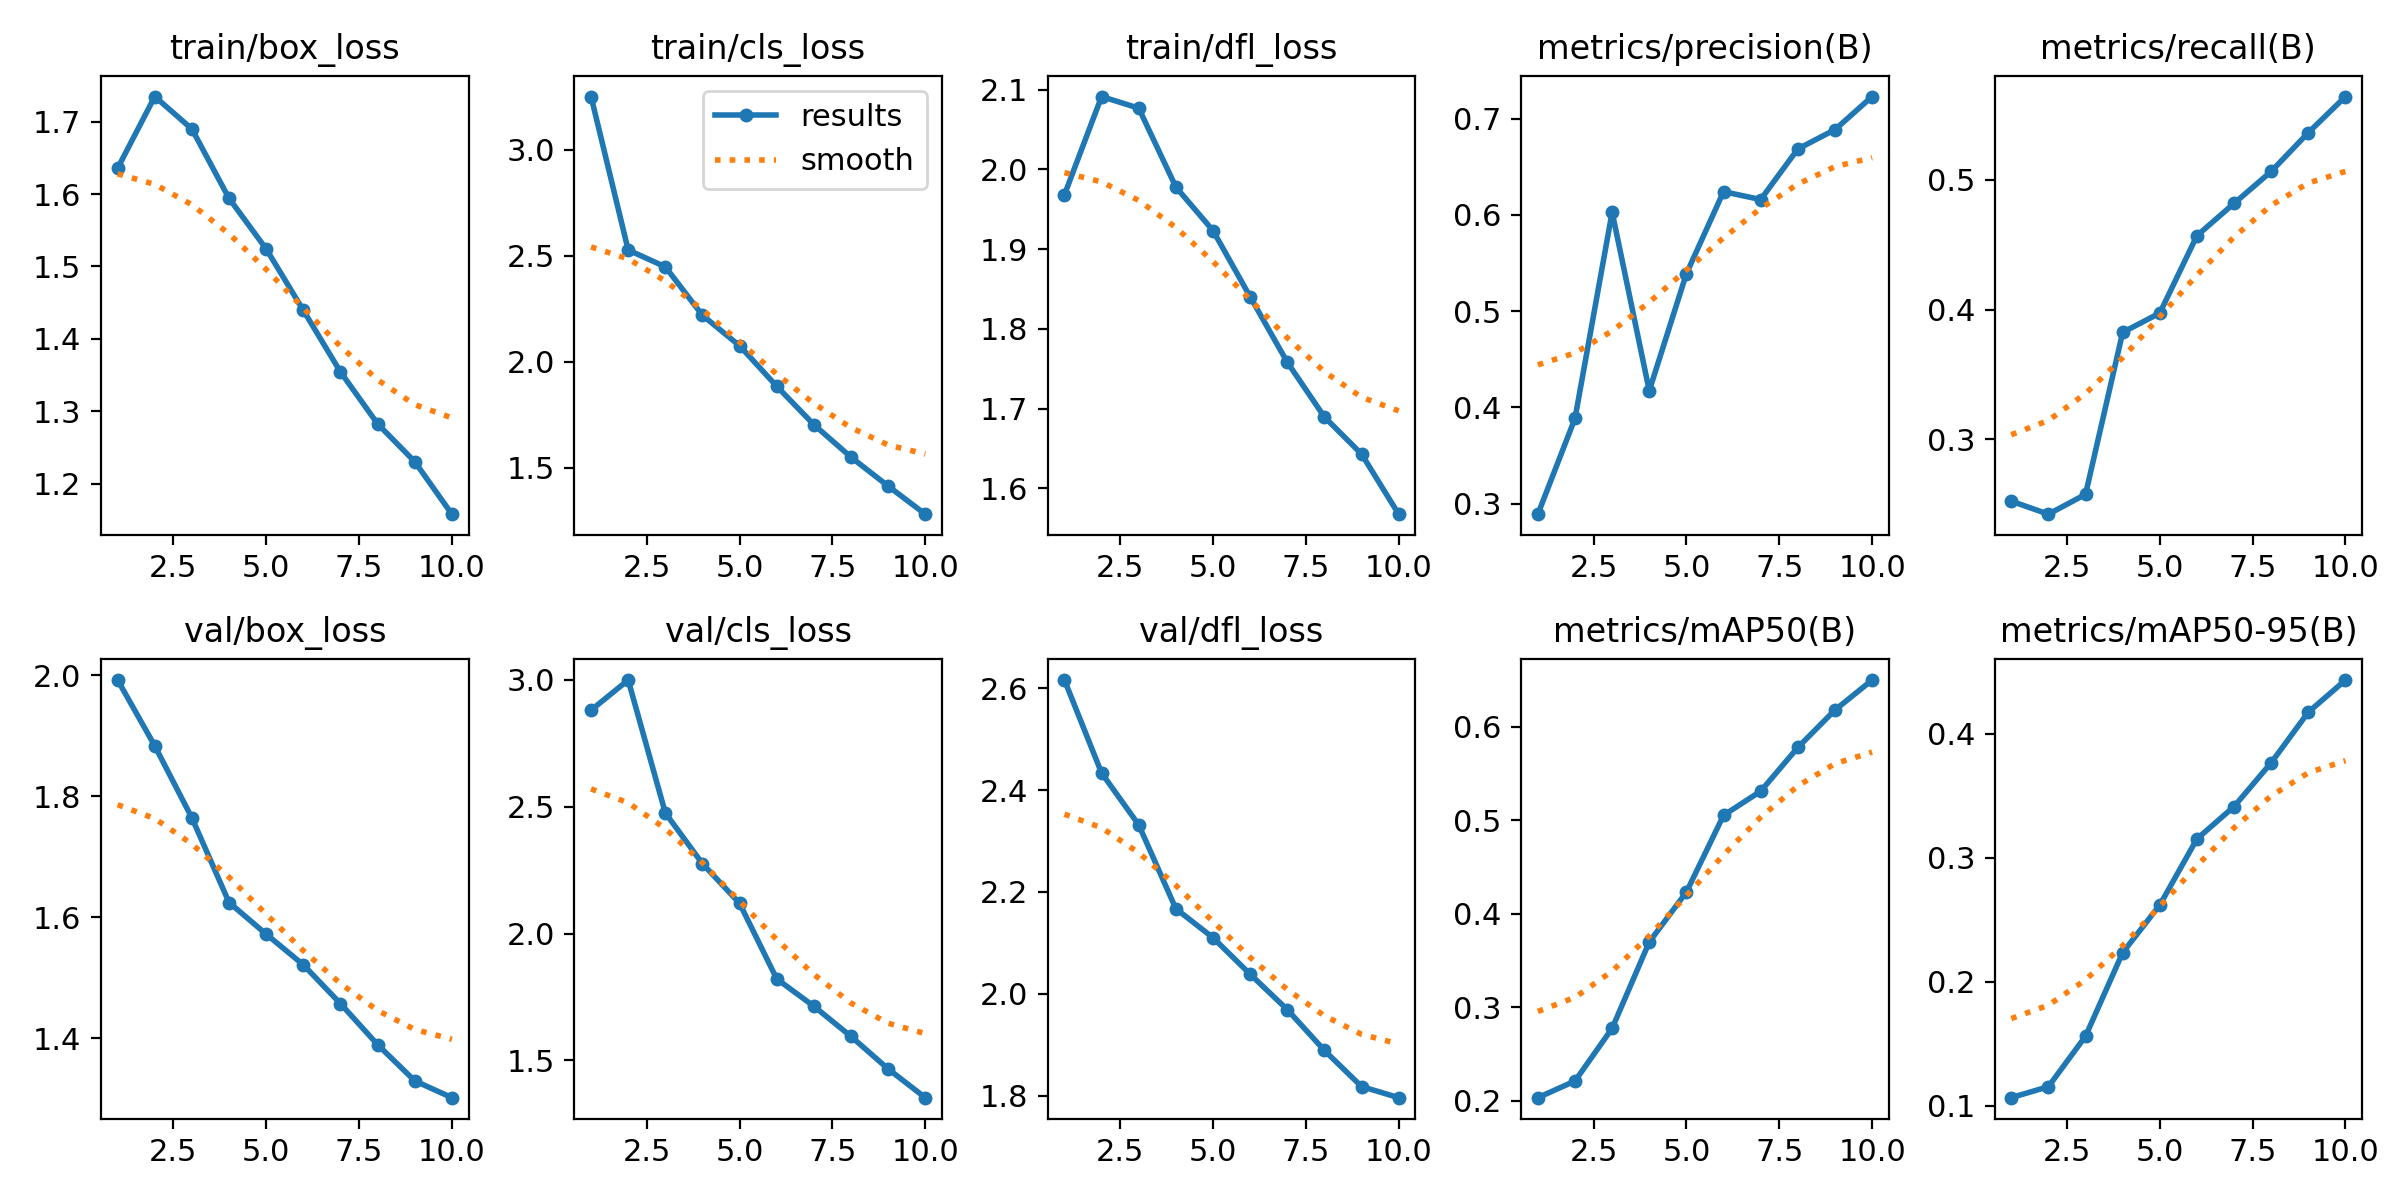

In [ ]:
# %cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

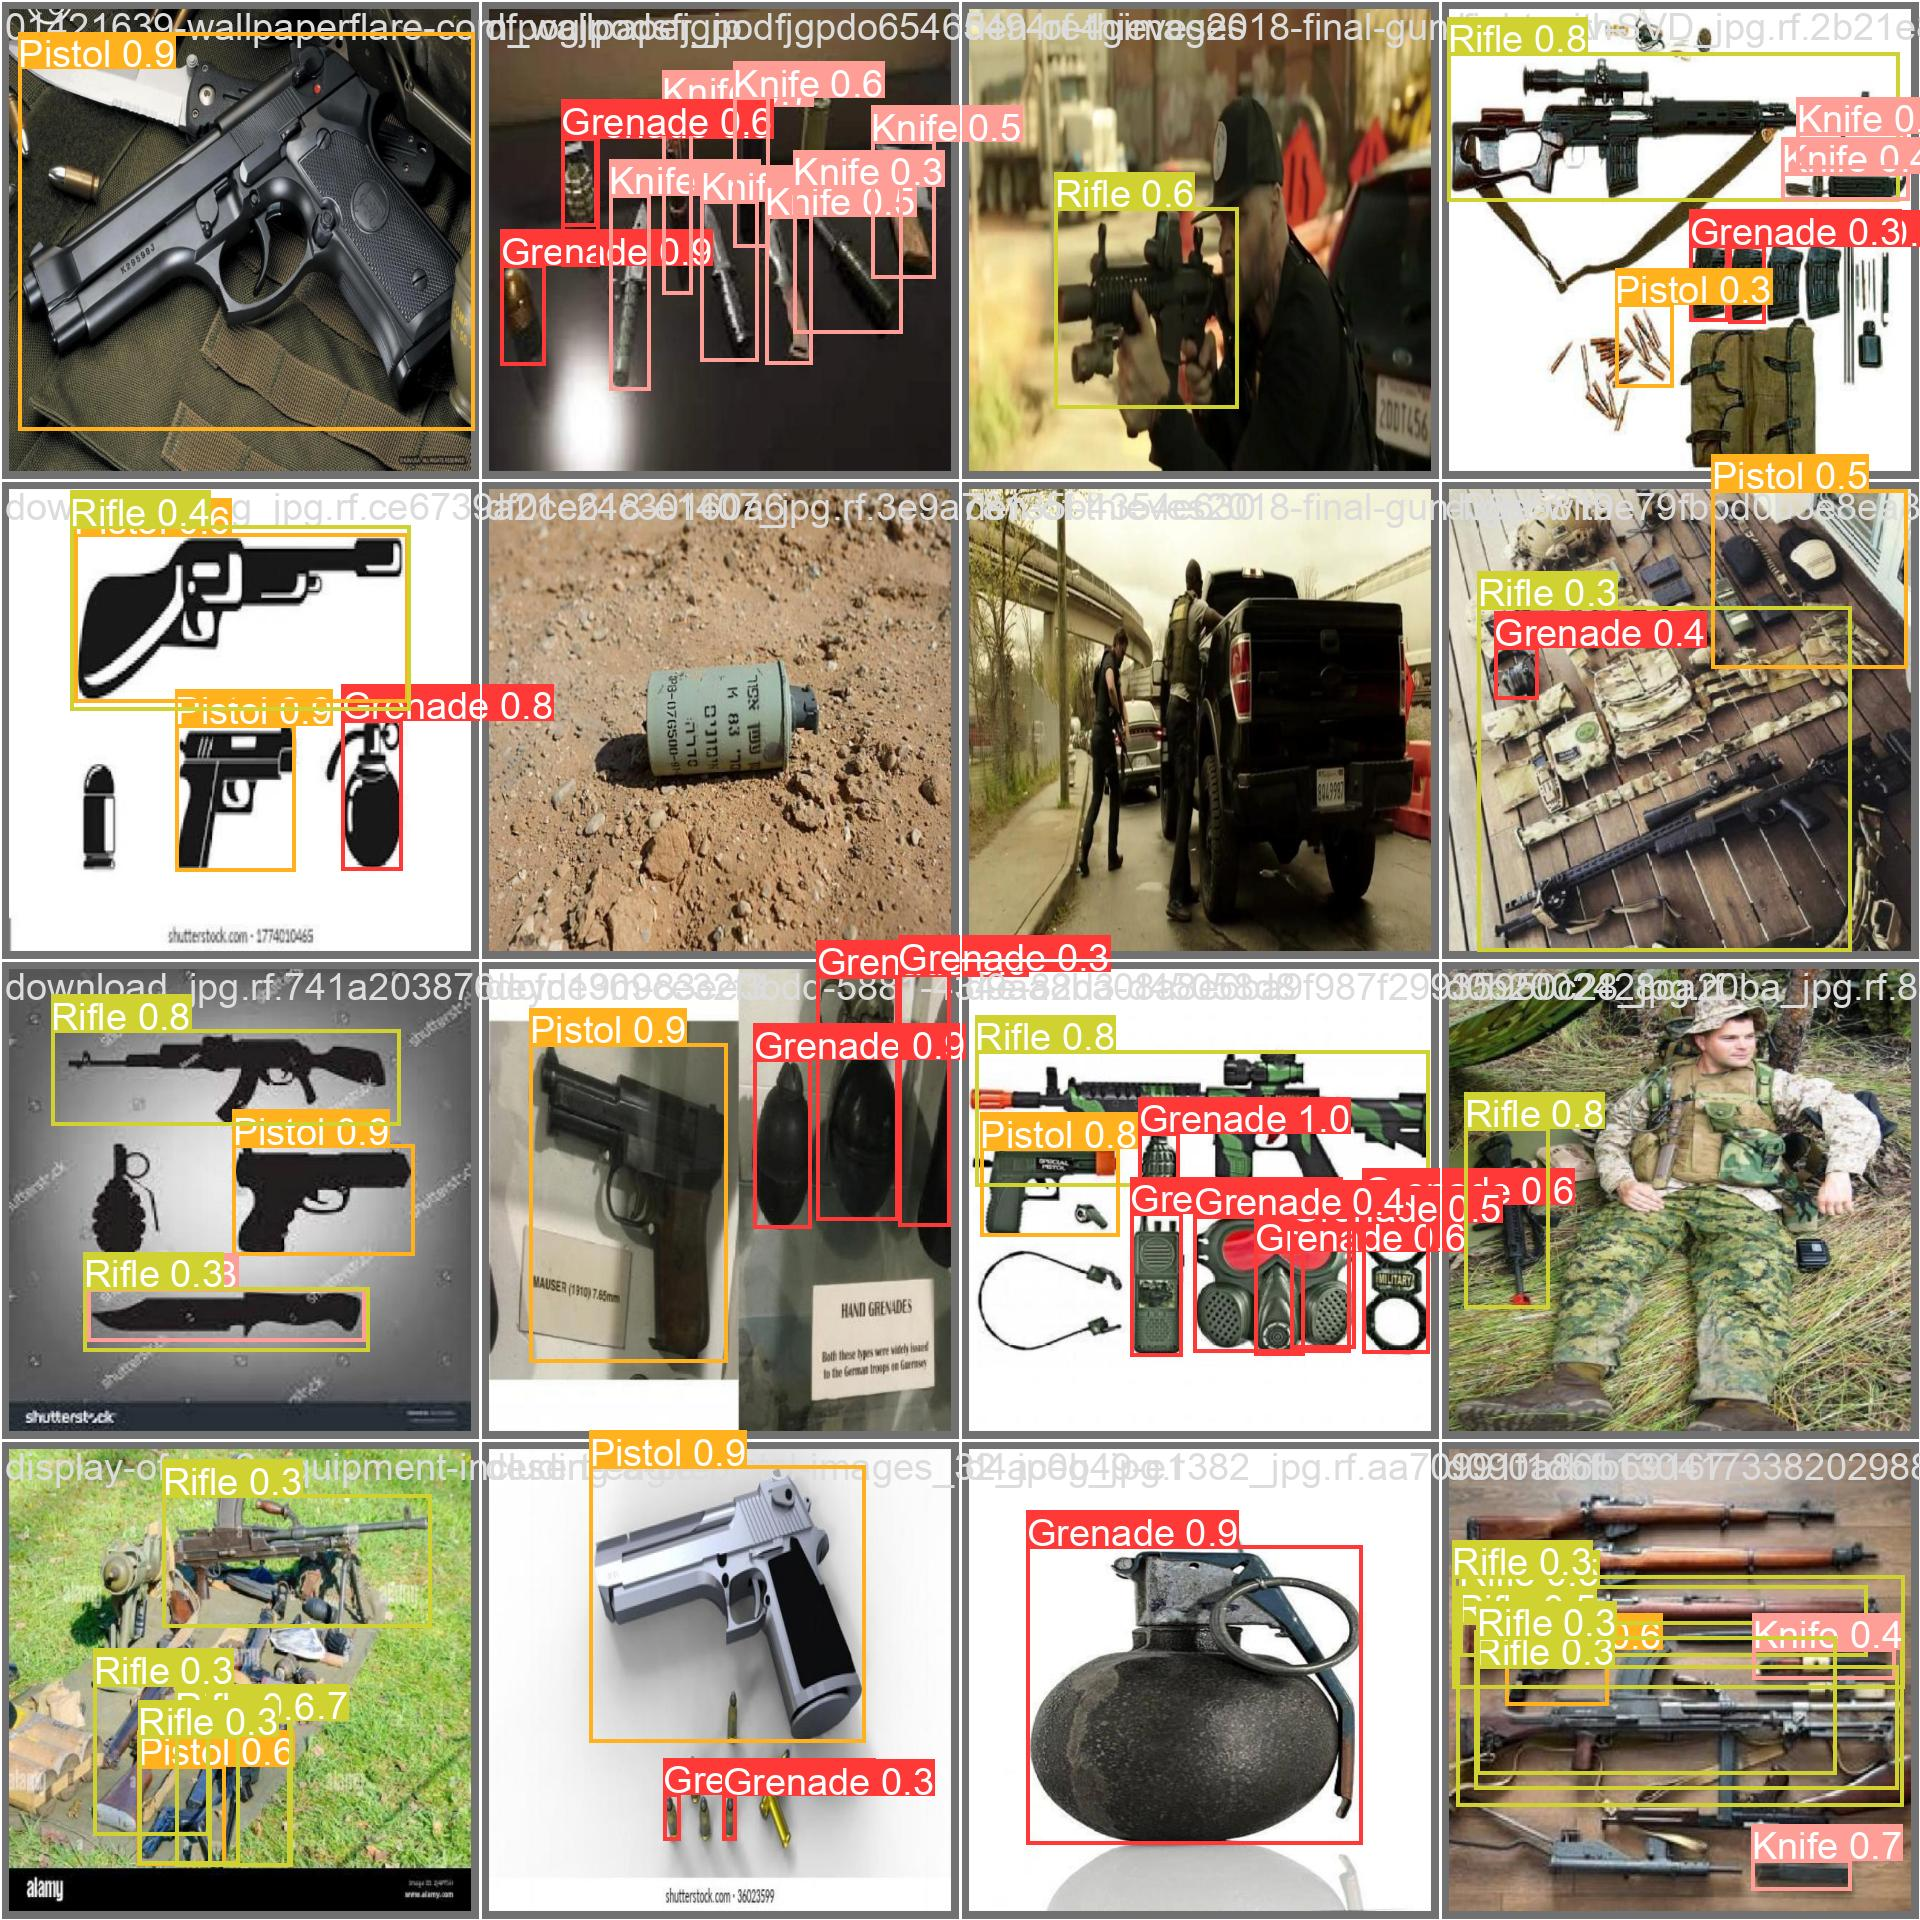

In [ ]:
# %cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

# Validation

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/datasets/weapon-detection-1/data.yaml

Ultralytics YOLOv8.0.219 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/weapon-detection-1/valid/labels.cache... 1815 images, 0 backgrounds, 0 corrupt: 100% 1815/1815 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 2963. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 114/114 [00:38<00:00,  2.95it/s]
                   all       1815       2963      0.725      0.564       0.65      0.443
               Grenade       1815        546      0.754      0.679      0.743      0.568
                 Knife       1815        349      0.616      0.408      0.475      0.297
                Pisto

# Inference

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/weapon-detection-1/test/images save=True

Ultralytics YOLOv8.0.219 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs

image 1/636 /content/datasets/weapon-detection-1/test/images/00e8fdd668abf79ccc314a9121a7cfa5_jpg.rf.5e3416ef3d89e3110959d1871124c7ea.jpg: 800x800 1 Grenade, 2 Rifles, 24.7ms
image 2/636 /content/datasets/weapon-detection-1/test/images/02338646-ep272_jpg.rf.4f2fafa6eb60c4d3e30bfd7a61a5ac6e.jpg: 800x800 1 Grenade, 24.6ms
image 3/636 /content/datasets/weapon-detection-1/test/images/05100d70-BOCW-Ballistic-Knife-001_jpg.rf.fd16c74947b2e17fd2c02d66c90e5cfc.jpg: 800x800 (no detections), 24.6ms
image 4/636 /content/datasets/weapon-detection-1/test/images/08NZ4L1H37OK_jpg.rf.2b50388c3b5f010b777d1c20b2706cfd.jpg: 800x800 3 Rifles, 24.6ms
image 5/636 /content/datasets/weapon-detection-1/test/images/0E88G6TJFBCF_jpg.rf.c574e2ac0e4d13baaf14c449e770862e.jpg: 800x800 1 Rifle, 24.6ms
image 6/636 /content/datasets/weapon-detection-1/

# Results

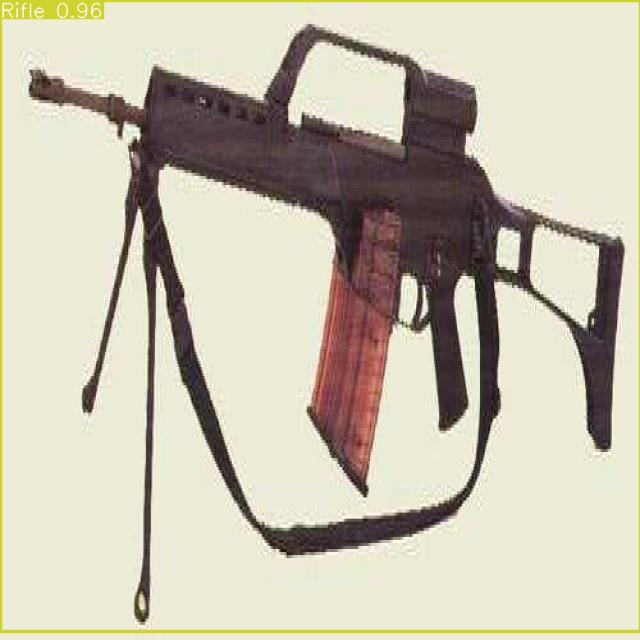

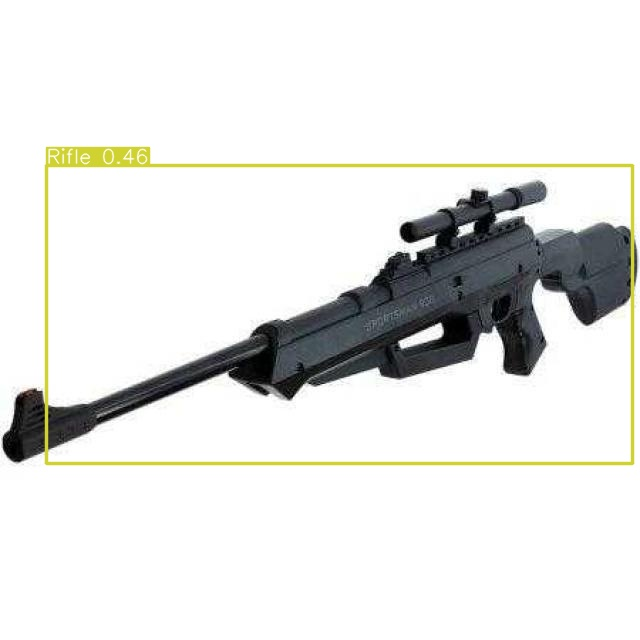

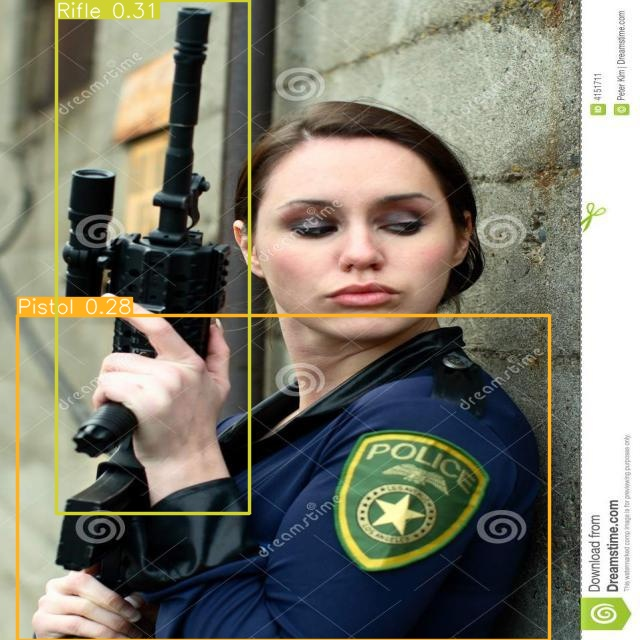

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")